In [1]:
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation, Dense, Flatten
from keras import backend
from keras.optimizers import SGD

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer as lbin

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


<center><h2>ShallowNet</h2>
<h4>a CNN with one convolutional layer</h4>

<h4> $ INPUT =>  CONV  =>  RELU  =>   FC $</h4>
</center>


In [2]:
class ShallowNet:
    @staticmethod
    def build(w, h, d, classes):
        # Initialize the model
        model = Sequential()
        # Set the shape of input layer
        input_layer_shape = (h,w,d)
        # Add CONV layer
        model.add(Conv2D(32,(3,3), padding="same", input_shape=input_layer_shape))
        # Set activation function of the CONV layer
        model.add(Activation("relu"))
        # Reshape 32, 3, 3 into 32 * 3 * 3
        model.add(Flatten())
        # Add softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        return model

### 1. Try ShallowNet with MNIST dataset

In [3]:
from keras.datasets import mnist

Load MNIST dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train / 255
X_test = X_test / 255

Hyperparameters and input shapes

In [6]:
learning_rate = 0.01
optimizer = SGD(lr=learning_rate, momentum=0.9, nesterov=True)
batch_size = 32
w, h = X_train[0].shape
d = 1
classes = 10
epochs = 15
verbose = 1

In [7]:
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [8]:
(batch_size, h,w)

(32, 28, 28)

Convert labels to one-hot encoding

In [9]:
y_train = lbin().fit_transform(y_train)
y_test = lbin().fit_transform(y_test)

In [10]:
model = ShallowNet.build(w,h,d, classes)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])

H = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=batch_size, epochs=epochs, verbose = verbose)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.2591 - acc: 0.9255 - val_loss: 0.1049 - val_acc: 0.9715
Epoch 2/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0946 - acc: 0.9725 - val_loss: 0.0794 - val_acc: 0.9767
Epoch 3/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0669 - acc: 0.9801 - val_loss: 0.0740 - val_acc: 0.9775
Epoch 4/15
60000/60000 [==============================] - 5s 76us/step - loss: 0.0541 - acc: 0.9836 - val_loss: 0.0710 - val_acc: 0.9773
Epoch 5/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.0457 - acc: 0.9863 - val_loss: 0.0593 - val_acc: 0.9812
Epoch 6/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.0390 - acc: 0.9875 - val_loss: 0.0656 - val_acc: 0.9792
Epoch 7/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.0332 - acc: 0.9900 - val_loss: 0.0618 - val_acc

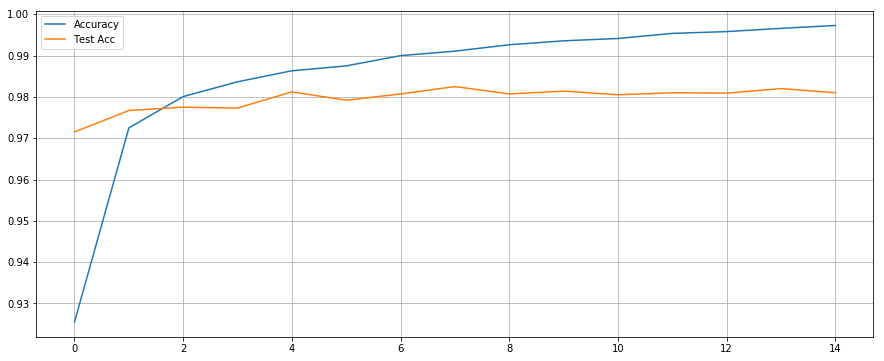

In [11]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(0,epochs), H.history["acc"])
plt.plot(np.arange(0,epochs), H.history["val_acc"])
plt.legend(('Accuracy', "Test Acc"))
plt.grid()
plt.show()


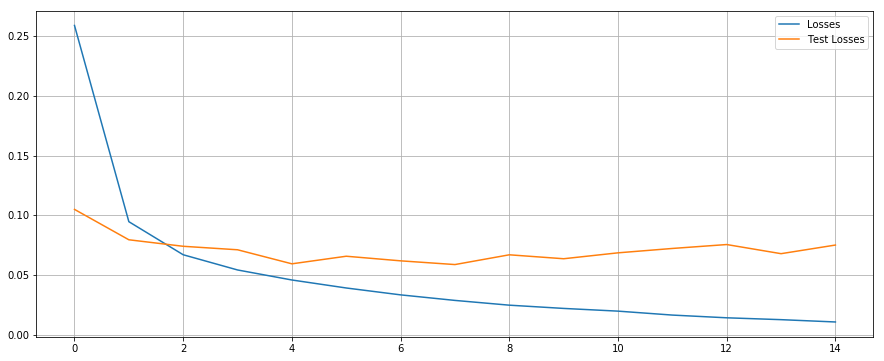

In [12]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(0,epochs), H.history["loss"])
plt.plot(np.arange(0,epochs), H.history["val_loss"])
plt.legend(('Losses', "Test Losses"))
plt.grid()
plt.show()

[Loss, Accuracy]

In [13]:
model.evaluate(X_test, y_test, verbose=1)


10000/10000 [==============================] - 0s 32us/step


[0.07499780817511201, 0.981]